In [6]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img_fg = cv2.imread('Emoticon_00.png', cv2.IMREAD_UNCHANGED)
img_bg = cv2.imread('Full_contributions_00.jpg')
img_info = cv2.imread('Information.png')

_, mask = cv2.threshold(img_fg[:,:,3], 1 , 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

#--③ 전경 영상 크기로 배경 영상에서 ROI 잘라내기
img_fg = cv2.cvtColor(img_fg, cv2.COLOR_BGRA2BGR)
h1, w1 = img_fg.shape[:2]
h2, w2 = img_bg.shape[:2]

x = (w2 - w1)//2
y = (h2 - h1)//3
w = x + w1
h = y + h1
roi = img_bg[y:h, x:w]

#--④ 마스크 이용해서 오려내기
masked_fg = cv2.bitwise_and(img_fg, img_fg, mask=mask)
masked_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)

#--⑥ 이미지 합성
added = masked_fg + masked_bg
img_bg[y:h, x:w] = added

#--② 마스크 생성, 합성할 이미지 전체 영역을 255로 셋팅
mask2 = np.full_like(img_info, 255)
 
#--③ 합성 대상 좌표 계산(img2의 중앙)
height, width = img_bg.shape[:2]
bottom = (width//2, 360)

#--④ seamlessClone 으로 합성 
BusinessCard = cv2.seamlessClone(img_info, img_bg, mask2, bottom, cv2.NORMAL_CLONE)
#--⑤ 결과 출력
cv2.imwrite('MyCard.jpg', BusinessCard)
cv2.imshow('MyCard', BusinessCard)
cv2.waitKey()
cv2.destroyAllWindows()

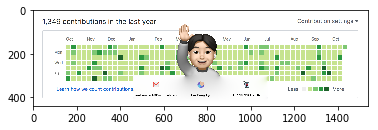

In [7]:
plt.imshow(cv2.cvtColor(BusinessCard, cv2.COLOR_BGR2RGB))
plt.show()